### 머신러닝
* 머신에게 학습을 시킨다.
* 어떤 향후(새로운 데이터)에 대해 적용 가능한 규칙을 생성
* 예측
* 예측을 더 잘하나~

### 열
* feature(특징, 피처, 특성)
* variable(변수)
* 컬럼

### 특성 추출 or feature engineering
* 새도운 특징 만들기
* feature에서 어떤 인사이트를 찾는 것.
* 결측치 처리, 결측치 확인.

### 클래스(class)와 레이블
* 레이블(label): 원하는 답.
* 클래스(class): 레이블의 범주

### 머신러닝 구분
* 지도학습
    * 예측하고자 하는 목표(target)가 존재.
* 비지도학습
    * 예측하고자 하는 목표가 존재하지 않는다.

### 지도학습 구분
* Regression(회귀) - 수치형 변수
* Classification(분류) - 범주형 변수

* 통계학
    * 독립변수(입력)
    * 종속변수(출력)

### 머신러닝 구분
* 지도학습
    * 회귀(regression)
    * 분류(classification)
        * 이항(이진)분류: 두개의 범주
        * 다항분류: 세개 이상의 분류
* 비지도학습
    * 군집
    * 차원변환

In [1]:
# import matplotlib
# from matplotlib import font_manager, rc
# import matplotlib.pyplot as plt
# import platform

# path = 'C:/Windows/Fonts/malgun.ttf'
# if platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# elif platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# else:
#     print('Unknown System')

# matplotlib.rcParams['axes.unicode_minus'] = False

# %matplotlib inline

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\posky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


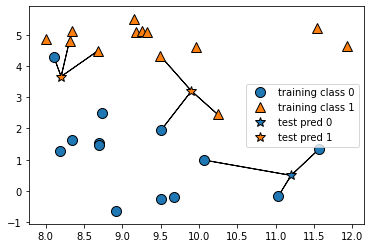

In [5]:
# classification knn
mglearn.plots.plot_knn_classification(n_neighbors=3)

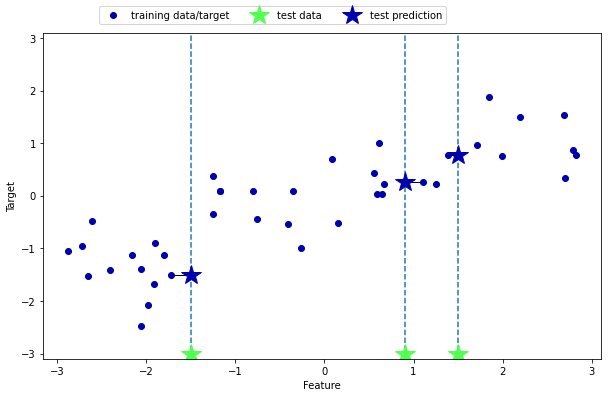

In [6]:
# regression knn
mglearn.plots.plot_knn_regression(n_neighbors=1)

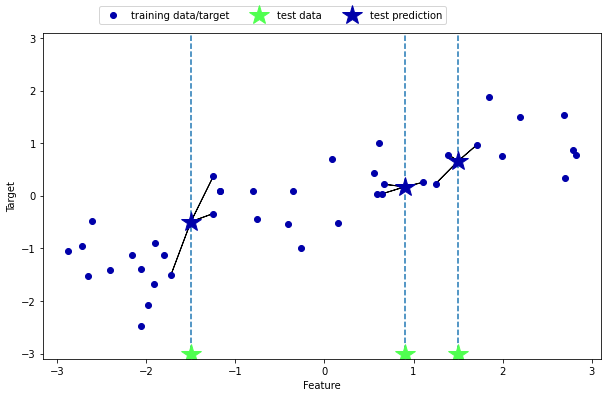

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

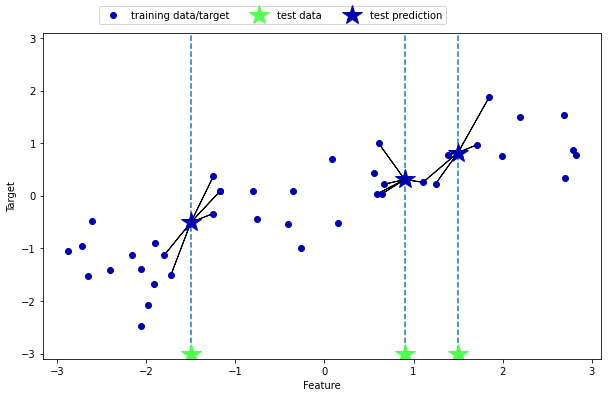

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

### 하이퍼 파라미터 k에 따른 결정경계
* k의 값에 따른 어디로 분류가 되는지에 대한 결정 경계를 보여준다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\posky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19, 2), (7, 2), (19,), (7,))

c:\Users\posky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\posky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\posky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\posky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\posky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\posky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

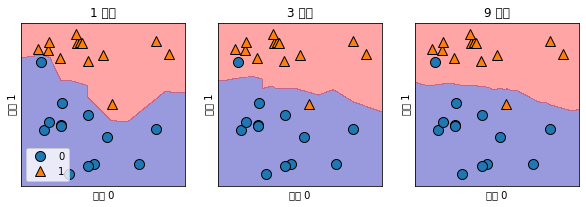

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 일반화, 과대적합, 과소적합
* 모델이 처음보는 데이터에 대해 예측이 가능아다면 이를 훈련세트에서 테스트 세트로 일반화(generalization) 되었다고 한다.
* 복잡한 모델(학습용 데이터에만 충실한)을 만든다면 훈련세트에만 정확한 모델이 된다. (과대적합)
    * 과대적합(overfitting)는 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터가 일반화되기 어려울 때 발생.
* 반대로 모델이 너무 간단해서 잘 예측을 못함. (과소적합-underfitting)

* k개가 작이면 작을수록 과대적합이 될 가능성이 있다.


In [13]:
# 유방암 데이터 셋 실습
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [14]:
cancer = load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))
print('data matrix: {}'.format(cancer.data.shape))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
data matrix: (569, 30)


In [15]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=cancer.target,
    random_state=77
)

In [18]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

426
target y의 
 0의 개수 : 212 
 1의 개수 : 357


In [19]:
y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7478991596638656, test비율 : 0.25210084033613445
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.75, test비율 : 0.25


In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [32]:
(pred == y_test).sum() / len(pred) * 100

90.9090909090909

In [33]:
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_tr, acc_test

(0.9553990610328639, 0.9090909090909091)

In [34]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)

for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)

    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)

    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)

    print('k:', n)
    print('trainset acc {:.3f}'.format(acc_tr))
    print('test acc {:.3f}'.format(acc_test))

k: 1
trainset acc 1.000
test acc 0.888
k: 3
trainset acc 0.955
test acc 0.909
k: 5
trainset acc 0.953
test acc 0.916
k: 7
trainset acc 0.953
test acc 0.909
k: 9
trainset acc 0.946
test acc 0.909
k: 11
trainset acc 0.939
test acc 0.909
k: 13
trainset acc 0.937
test acc 0.916
k: 15
trainset acc 0.939
test acc 0.916
k: 17
trainset acc 0.934
test acc 0.923
k: 19
trainset acc 0.937
test acc 0.923
k: 21
trainset acc 0.934
test acc 0.923


In [35]:
import seaborn as sns

In [36]:
dat = {'tr_acc': tr_acc, 'test_acc': test_acc}
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.888112
3,0.955399,0.909091
5,0.953052,0.916084
7,0.953052,0.909091
9,0.946009,0.909091
11,0.938967,0.909091
13,0.936620,0.916084
15,0.938967,0.916084
17,0.934272,0.923077
19,0.936620,0.923077


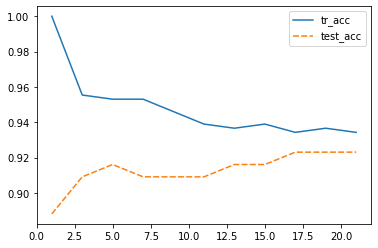

In [37]:
sns.lineplot(data=data_df, palette='tab10')
plt.show()

In [38]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 101)

for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)

    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)

    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)

In [39]:
dat = {'tr_acc': tr_acc, 'test_acc': test_acc}
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.888112
2,0.974178,0.902098
3,0.955399,0.909091
4,0.953052,0.902098
5,0.953052,0.916084
...,...,...
96,0.910798,0.909091
97,0.913146,0.909091
98,0.910798,0.909091
99,0.913146,0.916084


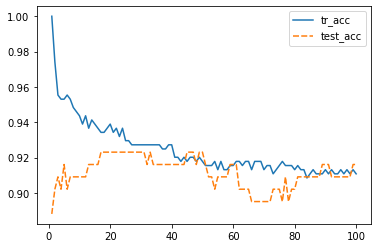

In [40]:
sns.lineplot(data=data_df, palette='tab10')
plt.show()

In [43]:
max_test_acc_df = data_df.loc[data_df['test_acc'].max() == data_df['test_acc']]
max_test_acc_df

,tr_acc,test_acc
17,0.934272,0.923077
18,0.934272,0.923077
19,0.936620,0.923077
20,0.938967,0.923077
21,0.934272,0.923077
22,0.936620,0.923077
23,0.931925,0.923077
24,0.936620,0.923077
25,0.929577,0.923077
26,0.929577,0.923077


In [44]:
max_test_acc_df.loc[max_test_acc_df['tr_acc'] == max_test_acc_df['tr_acc'].max()]

,tr_acc,test_acc
20,0.938967,0.923077
